In [1]:
# 參考資料：http://blog.datadive.net/selecting-good-features-part-i-univariate-selection/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#  <font color="red">Part I: univariate selection</font>

In [431]:
# 這部分請看參考資料.. 感覺不是一個好方法

# <font color="red"> Part II: linear models and regularization </font>

#### 最簡單的Linear regression, 係數越高，代表這個變數應該越重要。 不過不適合有highly correlated的情況存在時用

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [205]:
np.random.seed(0)
size = 1000

In [57]:
x = np.random.normal(0,1,(size,3)) # (size,3)是形狀
y = x[:,0]+2*x[:,1]+np.random.normal(0,2,size)

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(x,y)  # x有3個columns, 所以會配3個係數（ 不包含 intercept

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
lr.coef_  # 注意看, 只有第一個,第二個係數是準的

array([ 0.98631784,  1.96990009,  0.09119265])

In [61]:
lr.intercept_

-0.011857925151618834

In [63]:
#A helper method for pretty-printing linear models

def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)                                  # zip可以是把兩個list包成n個二維tuple。 n = len(list)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
 
print("Linear model:", pretty_print_linear(lr.coef_))


Linear model: 0.986 * X0 + 1.97 * X1 + 0.091 * X2


#### 有highly correlated版本的，還沒經過調節

In [428]:
from sklearn.linear_model import LinearRegression

size = 100
np.random.seed(seed = 5)


In [429]:
x_seed = np.random.normal(0,1,size)
x1 = x_seed + np.random.normal(0,1,size)
x2 = x_seed + np.random.normal(0,1,size)
x3 = x_seed + np.random.normal(0,1,size)

y = x1+x2+x3+np.random.normal(0,1,size)
x = np.array([x1,x2,x3]).T # 轉置矩陣


In [430]:
lr = LinearRegression()
lr.fit(x,y)
print("Linear model:",pretty_print_linear(lr.coef_))

Linear model: 0.782 * X0 + 1.072 * X1 + 1.184 * X2


In [252]:
#  可看到三個係數都亂七八糟的，雖然他們三個是一樣的

In [245]:
lr.intercept_

0.0070843404567377255

#### Linear Regression with regularization

In [246]:
# Regularization is a method for adding additional constraints or penalty to a model, 
# with the goal of preventing overfitting and improving generalization

In [247]:
# Instead of minimizing a loss function E(X,Y), the loss function to minimize becomes E(X,Y)+α‖w‖, 
# where w is the vector of model coefficients, ‖⋅‖ is typically L1 or L2 norm and α is a tunable free parameter, 
# specifying the amount of regularization 

In [249]:
# α可經由 Grid Search 調整

In [251]:
# 參考資料： https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/#five

## L1 regularization / Lasso

In [250]:
# 可當作 stepwise regression的一個替代！  可讓某些係數變成0，做feature selection

In [248]:
# 當有highly correlated features的時候， 如果有small data changes，係數還是會不穩，此時要依靠L2

In [554]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

boston = load_boston()
scaler = StandardScaler()
x = scaler.fit_transform(boston["data"])
y = boston["target"]
names = boston["feature_names"]

lasso = Lasso(alpha=.3)
lasso.fit(x,y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [555]:
print("Lasso model:", pretty_print_linear(lasso.coef_,names,sort=True))

Lasso model: -3.707 * LSTAT + 2.992 * RM + -1.757 * PTRATIO + -1.081 * DIS + -0.7 * NOX + 0.631 * B + 0.54 * CHAS + -0.236 * CRIM + 0.081 * ZN + -0.0 * INDUS + -0.0 * AGE + 0.0 * RAD + -0.0 * TAX


/Users/deniel3678/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


### grid search  for finding the best hyperparameters, say, Alpha in lasso linear regression

In [556]:
# 數據集可分為 training, validation, testing。 (train+val = 70, test = 30) 
# validation是用來調 training時的params  (70 做 KFold)
# testing是最後一步驟，當model已經有best params，可用來測驗。 此步驟可以比較不同model。  (用70訓練好的，測試30)

In [557]:
# scoring parameter can be specified.. for example in unbalanced classification, the accuracy score is often uninformative

In [558]:
# e.g... 試圖把default改成 precision
from sklearn.metrics import average_precision_score

In [559]:
from sklearn.grid_search import GridSearchCV

In [560]:
lasso = Lasso()
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [561]:
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.8]}  # 從這個list之中挑一個最好的

In [562]:
cl = GridSearchCV(lasso,parameters,scoring="mean_squared_error")  # scoring是評分依據

In [563]:
cl.fit(x,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [564]:
cl.grid_scores_

[mean: -44.49228, std: 24.85585, params: {'alpha': 0.1},
 mean: -45.63718, std: 26.79289, params: {'alpha': 0.2},
 mean: -48.89647, std: 29.36383, params: {'alpha': 0.3},
 mean: -51.47701, std: 30.62726, params: {'alpha': 0.4},
 mean: -57.03013, std: 32.50172, params: {'alpha': 0.8}]

In [566]:
# mse竟然是負的原因...
#Whether score_func is a score function (default), meaning high is good, 
#or a loss function, meaning low is good. In the latter case, the scorer 
#object will sign-flip the outcome of the score_func.

#這邊的mse被當成 scoring function，所以要加一個負號，才能越高越好。

In [485]:
cl.best_params_

{'alpha': 0.1}

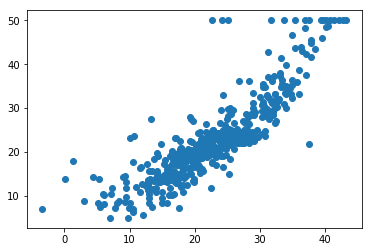

In [487]:
plt.scatter(cl.predict(x),y)   # cl.predict是以grid search找出來的best params來預測

In [488]:
# 詳細文件：http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [551]:
# gridsearch畫圖 小小範例

In [489]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

digits = datasets.load_digits()
X = digits.data
y = digits.target

clf_ = SVC(kernel='rbf')
Cs = [1, 10, 100, 1000]
Gammas = [1e-3, 1e-4]
clf = GridSearchCV(clf_,
            dict(C=Cs,
                 gamma=Gammas),
                 cv=2,
                 pre_dispatch='1*n_jobs',
                 n_jobs=1)


In [490]:
clf.fit(X, y)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]},
       pre_dispatch='1*n_jobs', refit=True, scoring=None, verbose=0)

In [491]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [492]:
scores = [x[1] for x in clf.grid_scores_]

In [532]:
scores

[0.96048970506399556,
 0.9360044518642181,
 0.96271563717306619,
 0.94546466332776846,
 0.96271563717306619,
 0.94657762938230383,
 0.96271563717306619,
 0.94657762938230383]

In [533]:
scores = np.array(scores).reshape(len(Cs), len(Gammas))

In [543]:
scores

array([[ 0.96048971,  0.93600445],
       [ 0.96271564,  0.94546466],
       [ 0.96271564,  0.94657763],
       [ 0.96271564,  0.94657763]])

In [550]:
scores[0]

array([ 0.96048971,  0.93600445])

In [538]:
for ind, i in enumerate(Cs):
    print(ind,i)

0 1
1 10
2 100
3 1000


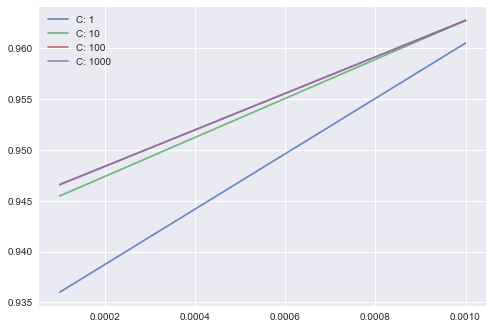

In [599]:
for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i),alpha=0.8) # 會跑出4條線
plt.legend()
plt.savefig("test.eps") # 輸出成向量圖的範例

### RandomizedSearchCV for finding the best hyperparameters, say, Alpha in lasso linear regression

In [568]:
# 另一種parameter searching的方式。 優點是可以很有效率
# 參考文件：http://scikit-learn.org/stable/modules/grid_search.html

In [571]:
from scipy.stats import randint as sp_randint # uniform discrete distribution

In [ ]:
# params 可以長這樣子
param_dist = {"n_estimators": sp_randint (1, 11), 
                  "max_depth": [3, None],
                  "max_features": sp_randint(1, 11),
                  "min_samples_split": sp_randint(1, 11),
                  "min_samples_leaf": sp_randint(1, 11),
                 }

In [584]:
g = sp_randint(1, 6)

In [594]:
g.rvs(2)  # random variate sample

array([5, 5])

## L2 regularization / Ridge regression

In [567]:
# 和L1不同，不會讓係數為0，如果indept vars有highly correlated，結果相較穩定

In [600]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score   # 大概就是R square
size = 100

In [609]:
for i in range(10):
    print("Random Seed %s"%i)
    np.random.seed(seed=i)
    
    X_seed = np.random.normal(0,1,size)
    x1 = X_seed + np.random.normal(0,1,size)
    x2 = X_seed + np.random.normal(0,1,size)
    x3 = X_seed + np.random.normal(0,1,size)
    Y = x1+x2+x3 + np.random.normal(0,1,size)
    x = np.array([x1,x2,x3]).T
    
    lr = LinearRegression()
    lr.fit(x,Y)
    print("Linear Model:",pretty_print_linear(lr.coef_))
    
    ridge = Ridge(alpha=1)
    ridge.fit(x,Y)
    print("Ridge Model:",pretty_print_linear(ridge.coef_))
    
    print("\n")

Random Seed 0
Linear Model: 0.963 * X0 + 1.12 * X1 + 0.882 * X2
Ridge Model: 0.961 * X0 + 1.116 * X1 + 0.88 * X2


Random Seed 1
Linear Model: 0.97 * X0 + 1.09 * X1 + 0.786 * X2
Ridge Model: 0.968 * X0 + 1.086 * X1 + 0.784 * X2


Random Seed 2
Linear Model: 0.979 * X0 + 0.928 * X1 + 1.098 * X2
Ridge Model: 0.978 * X0 + 0.925 * X1 + 1.093 * X2


Random Seed 3
Linear Model: 0.924 * X0 + 1.028 * X1 + 1.051 * X2
Ridge Model: 0.92 * X0 + 1.026 * X1 + 1.049 * X2


Random Seed 4
Linear Model: 0.953 * X0 + 1.0 * X1 + 1.145 * X2
Ridge Model: 0.952 * X0 + 0.997 * X1 + 1.141 * X2


Random Seed 5
Linear Model: 0.782 * X0 + 1.072 * X1 + 1.184 * X2
Ridge Model: 0.783 * X0 + 1.068 * X1 + 1.18 * X2


Random Seed 6
Linear Model: 1.03 * X0 + 0.901 * X1 + 1.102 * X2
Ridge Model: 1.027 * X0 + 0.899 * X1 + 1.099 * X2


Random Seed 7
Linear Model: 1.059 * X0 + 1.09 * X1 + 0.904 * X2
Ridge Model: 1.055 * X0 + 1.085 * X1 + 0.904 * X2


Random Seed 8
Linear Model: 0.942 * X0 + 1.127 * X1 + 1.06 * X2
Ridge Mode

In [611]:
# As you can see from the example, the coefficients can vary widely for linear regression, depending on the generated data. 
# For L2 regularized model however, the coefficients are quite stable and closely reflect how the data was generated,
# all coefficients close to 1.
# 為何？ 我猜測可能是因為還有一個衰老項, gradient收斂比較快

## 小結兩者功能：

* Lasso 用來選 subset of features，因為她可以把某些係數變為0
* Ridge 可用來解釋自變數和依變數的關係，因為他的係數相對穩定

Since the relationship between the response variable and features in often non-linear, basis expansion can be used to convert features into a more suitable space, while keeping the simple linear models fully applicable.

上面這小段指的 basis expansion就是 feature engineering, transformation


# <font color="red"> Part III: random forests </font>

In [2]:
# 有兩種篩選方法

#### Mean decrease impurity

In [3]:
# 比較無法看出自變數、依變數之間的關係

In [4]:
#  With correlated features, strong features can end up with low scores and 
#  the method can be biased towards variables with many categories. 

In [6]:
# sklearn的 rfc.important features_ 套件用的方法

In [26]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np

boston = load_boston()
x = boston["data"]
y = boston["target"]
names = boston["feature_names"]
rf = RandomForestRegressor()
rf.fit(x,y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [27]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x,4),rf.feature_importances_),names), reverse=True)) # zip就是可以把多個lists合成1個list。

Features sorted by their score:
[(0.41339999999999999, 'LSTAT'), (0.38890000000000002, 'RM'), (0.072099999999999997, 'DIS'), (0.026700000000000002, 'CRIM'), (0.025600000000000001, 'NOX'), (0.018800000000000001, 'PTRATIO'), (0.017899999999999999, 'TAX'), (0.015299999999999999, 'AGE'), (0.011299999999999999, 'B'), (0.0041999999999999997, 'INDUS'), (0.0038999999999999998, 'RAD'), (0.0012999999999999999, 'ZN'), (0.00050000000000000001, 'CHAS')]


#### Mean decrease accuracy

In [1]:
# permute the values of each feature and
# measure how much the permutation decreases the accuracy of the model

In [2]:
# 其實和 Mean decrease impurity差不多
# 依然是無法比較出哪個變數比較重要，只能篩選出..可以做的變數。

In [26]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict    # 很好用的套件

x = boston["data"]
y = boston["target"]

rf = RandomForestRegressor()
scores = defaultdict(list)  # [('blue', [2, 4]), ('red', [1]), ('yellow', [1, 3])] 長這樣的型態

In [28]:
for train_idx, test_idx in ShuffleSplit(len(x),100, .3):  # 共有100份..就是100個iterations
    X_train, X_test = x[train_idx],x[test_idx]
    y_train, y_test = y[train_idx],y[test_idx]
    r = rf.fit(X_train,y_train)
    acc = r2_score(y_test,rf.predict(X_test))
    for i in range(x.shape[1]):
        x_t = X_test.copy()    # 用.copy()不會影響到用先的X_test
        np.random.shuffle(x_t[:,i])    # scramle one of the features
        shuffle_acc = r2_score(y_test,rf.predict(x_t))
        scores[names[i]].append((acc-shuffle_acc)/acc)
print("Features sorted by their score:")
print(sorted([ (round(np.mean(score),4),feat)  for feat,score in scores.items()], reverse=True))

Features sorted by their score:
[(0.73440000000000005, 'LSTAT'), (0.56559999999999999, 'RM'), (0.097299999999999998, 'DIS'), (0.043299999999999998, 'CRIM'), (0.024400000000000002, 'PTRATIO'), (0.017500000000000002, 'TAX'), (0.011900000000000001, 'AGE'), (0.0066, 'B'), (0.0061999999999999998, 'INDUS'), (0.0033999999999999998, 'RAD'), (0.00020000000000000001, 'CHAS'), (0.0001, 'ZN'), (-0.00040000000000000002, 'NOX')]


In [29]:
# 注意這是建模之後才permute...故不能說如果少了LSTAT，就會少0.7344，因為其他correlated features會頂替他。

#  <font color= "red"> Part IV: stability selection and RFE 

In [32]:
# 嘗試克服上面幾種方法遇到的問題

#### stability selection

In [40]:
# apply a feature selection algorithm on different subsets of data and with different subsets of features. 
# After repeating the process a number of times, the selection results can be aggregated, 
# for example by checking how many times a feature ended up being selected as important

In [41]:
from sklearn.linear_model import RandomizedLasso
from sklearn.datasets import load_boston
boston = load_boston()

In [42]:
x = boston["data"]
y = boston["target"]
names = boston["feature_names"]

rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(x,y)

RandomizedLasso(alpha=0.025, eps=2.2204460492503131e-16, fit_intercept=True,
        max_iter=500, memory=Memory(cachedir=None), n_jobs=1,
        n_resampling=200, normalize=True, pre_dispatch='3*n_jobs',
        precompute='auto', random_state=None, sample_fraction=0.75,
        scaling=0.5, selection_threshold=0.25, verbose=False)

In [43]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x,4), rlasso.scores_), names), reverse=True))

Features sorted by their score:
[(1.0, 'RM'), (1.0, 'PTRATIO'), (1.0, 'LSTAT'), (0.70499999999999996, 'CHAS'), (0.58999999999999997, 'B'), (0.41999999999999998, 'CRIM'), (0.40000000000000002, 'TAX'), (0.22500000000000001, 'DIS'), (0.16, 'NOX'), (0.089999999999999997, 'INDUS'), (0.080000000000000002, 'ZN'), (0.02, 'RAD'), (0.0, 'AGE')]


#### Recursive feature elimination

In [34]:
# Recursive feature elimination is based on the idea to repeatedly construct a model 
# (for example an SVM or a regression model) and choose either the best or worst performing feature
# (for example based on coefficients), setting the feature aside 
# and then repeating the process with the rest of the features. 
# This process is applied until all features in the dataset are exhausted. 
# Features are then ranked according to when they were eliminated. 
# As such, it is a greedy optimization for finding the best performing subset of features.

In [35]:
# The stability of RFE depends heavily on the type of model that is used for feature ranking at each iteration

In [48]:
# Just as non-regularized regression can be unstable, so can RFE when utilizing it,
# while using ridge regression can provide more stable results.

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
boston = load_boston()
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=2, verbose=1)
rfe.fit(X,Y)

# 從verbose可以看到，每一次會剔除最差的，最後留下最重要的 k個。 k = n_features_to_select 


Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=2, step=1, verbose=1)

In [74]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'NOX'), (2, 'RM'), (3, 'CHAS'), (4, 'PTRATIO'), (5, 'DIS'), (6, 'LSTAT'), (7, 'RAD'), (8, 'CRIM'), (9, 'INDUS'), (10, 'ZN'), (11, 'TAX'), (12, 'B'), (13, 'AGE')]


#  <font color= "red"> everything side by side </font>

In [97]:
# must read !!!

# http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/